# CAR PRICE PREDICTION & EDA WITH XGBoost Regression

# Import library

In [1]:
#Linear algebra & data processing
import numpy as np
import pandas as pd 

#Data visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

#Import transofmers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

#Import Regression method
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, ElasticNet, Lasso, LogisticRegression, LinearRegression

#Import model selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

#Import Accuracy Metrics
from sklearn.metrics import  r2_score, max_error,mean_squared_error, mean_absolute_error 
from time import time

import warnings 
warnings.filterwarnings("ignore")

# Some functions

In [2]:
def pourcentage(data):
    n = data.shape[0]
    ret = pd.DataFrame(data.isnull().sum(), columns=['missing_number'])
    ret['pourcentage_missing_number'] = (ret['missing_number']/n)*100
    ret['types'] = data.dtypes
    ret['duplicate'] = data.duplicated(keep=False).sum()
    ret['NAN'] = data.isna().sum()
    return ret

# Import data

In [3]:
df_car = pd.read_csv("/kaggle/input/carr-details/Car details v3.csv")
df_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Pre-processiong Data

In [4]:
pourcentage(df_car)

,missing_number,pourcentage_missing_number,types,duplicate,NAN
name,0,0.000000,object,1827,0
year,0,0.000000,int64,1827,0
selling_price,0,0.000000,int64,1827,0
km_driven,0,0.000000,int64,1827,0
fuel,0,0.000000,object,1827,0
seller_type,0,0.000000,object,1827,0
transmission,0,0.000000,object,1827,0
owner,0,0.000000,object,1827,0
mileage,221,2.718996,object,1827,221
engine,221,2.718996,object,1827,221


In [5]:
df_car = df_car.dropna(axis=0)

def convertToNumber(s:str):
    d=""
    for i in list(s):
        if i.isdigit():
            d += i
    return eval(d)

df_car["mileage"] = df_car["mileage"].apply(convertToNumber)
df_car["engine"] = df_car["engine"].apply(convertToNumber)
df_car["max_power"] = df_car["max_power"].apply(convertToNumber)

In [6]:
pourcentage(df_car)

,missing_number,pourcentage_missing_number,types,duplicate,NAN
name,0,0.0,object,1801,0
year,0,0.0,int64,1801,0
selling_price,0,0.0,int64,1801,0
km_driven,0,0.0,int64,1801,0
fuel,0,0.0,object,1801,0
seller_type,0,0.0,object,1801,0
transmission,0,0.0,object,1801,0
owner,0,0.0,object,1801,0
mileage,0,0.0,int64,1801,0
engine,0,0.0,int64,1801,0


In [7]:
df_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,234,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114,1498,10352,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,177,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,230,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,161,1298,882,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
data = df_car.drop(['name', 'torque', 'seller_type', 'owner'], axis=1)
data.head()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Manual,234,1248,74,5.0
1,2014,370000,120000,Diesel,Manual,2114,1498,10352,5.0
2,2006,158000,140000,Petrol,Manual,177,1497,78,5.0
3,2010,225000,127000,Diesel,Manual,230,1396,90,5.0
4,2007,130000,120000,Petrol,Manual,161,1298,882,5.0


In [9]:
data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,947.702378,1458.708829,2766.125348,5.416393
std,3.863695,8.135827e+05,5.679230e+04,925.336832,503.893057,5162.123778,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,35.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,185.000000,1197.000000,100.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,240.000000,1248.000000,739.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,1944.000000,1582.000000,3748.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3344.000000,3604.000000,108495.000000,14.000000


In [10]:
data.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [11]:
data_new = pd.get_dummies(data=data, columns=['fuel'], drop_first=True, dtype=int)

In [12]:
data_new.head()

,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
0,2014,450000,145500,Manual,234,1248,74,5.0,1,0,0
1,2014,370000,120000,Manual,2114,1498,10352,5.0,1,0,0
2,2006,158000,140000,Manual,177,1497,78,5.0,0,0,1
3,2010,225000,127000,Manual,230,1396,90,5.0,1,0,0
4,2007,130000,120000,Manual,161,1298,882,5.0,0,0,1


In [13]:
data_new["transmission"] = data_new["transmission"].replace({'Automatic': 1, 'Manual': 0})

In [14]:
data_new.head()

,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
0,2014,450000,145500,0,234,1248,74,5.0,1,0,0
1,2014,370000,120000,0,2114,1498,10352,5.0,1,0,0
2,2006,158000,140000,0,177,1497,78,5.0,0,0,1
3,2010,225000,127000,0,230,1396,90,5.0,1,0,0
4,2007,130000,120000,0,161,1298,882,5.0,0,0,1


# Scaling data

In [15]:
mmScaler = MinMaxScaler()
mmScaler_y = MinMaxScaler()

label_enc = LabelEncoder()

x = data_new[['year', 'km_driven','transmission', 'mileage', 'engine', 'max_power', 'seats', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol']].values
y = data_new[['selling_price']].values

In [16]:
x[:, 0] = label_enc.fit_transform(x[:, 0])
x = mmScaler.fit_transform(x)
y = mmScaler_y.fit_transform(y)

# Exploration Data Analysis And Correlation 

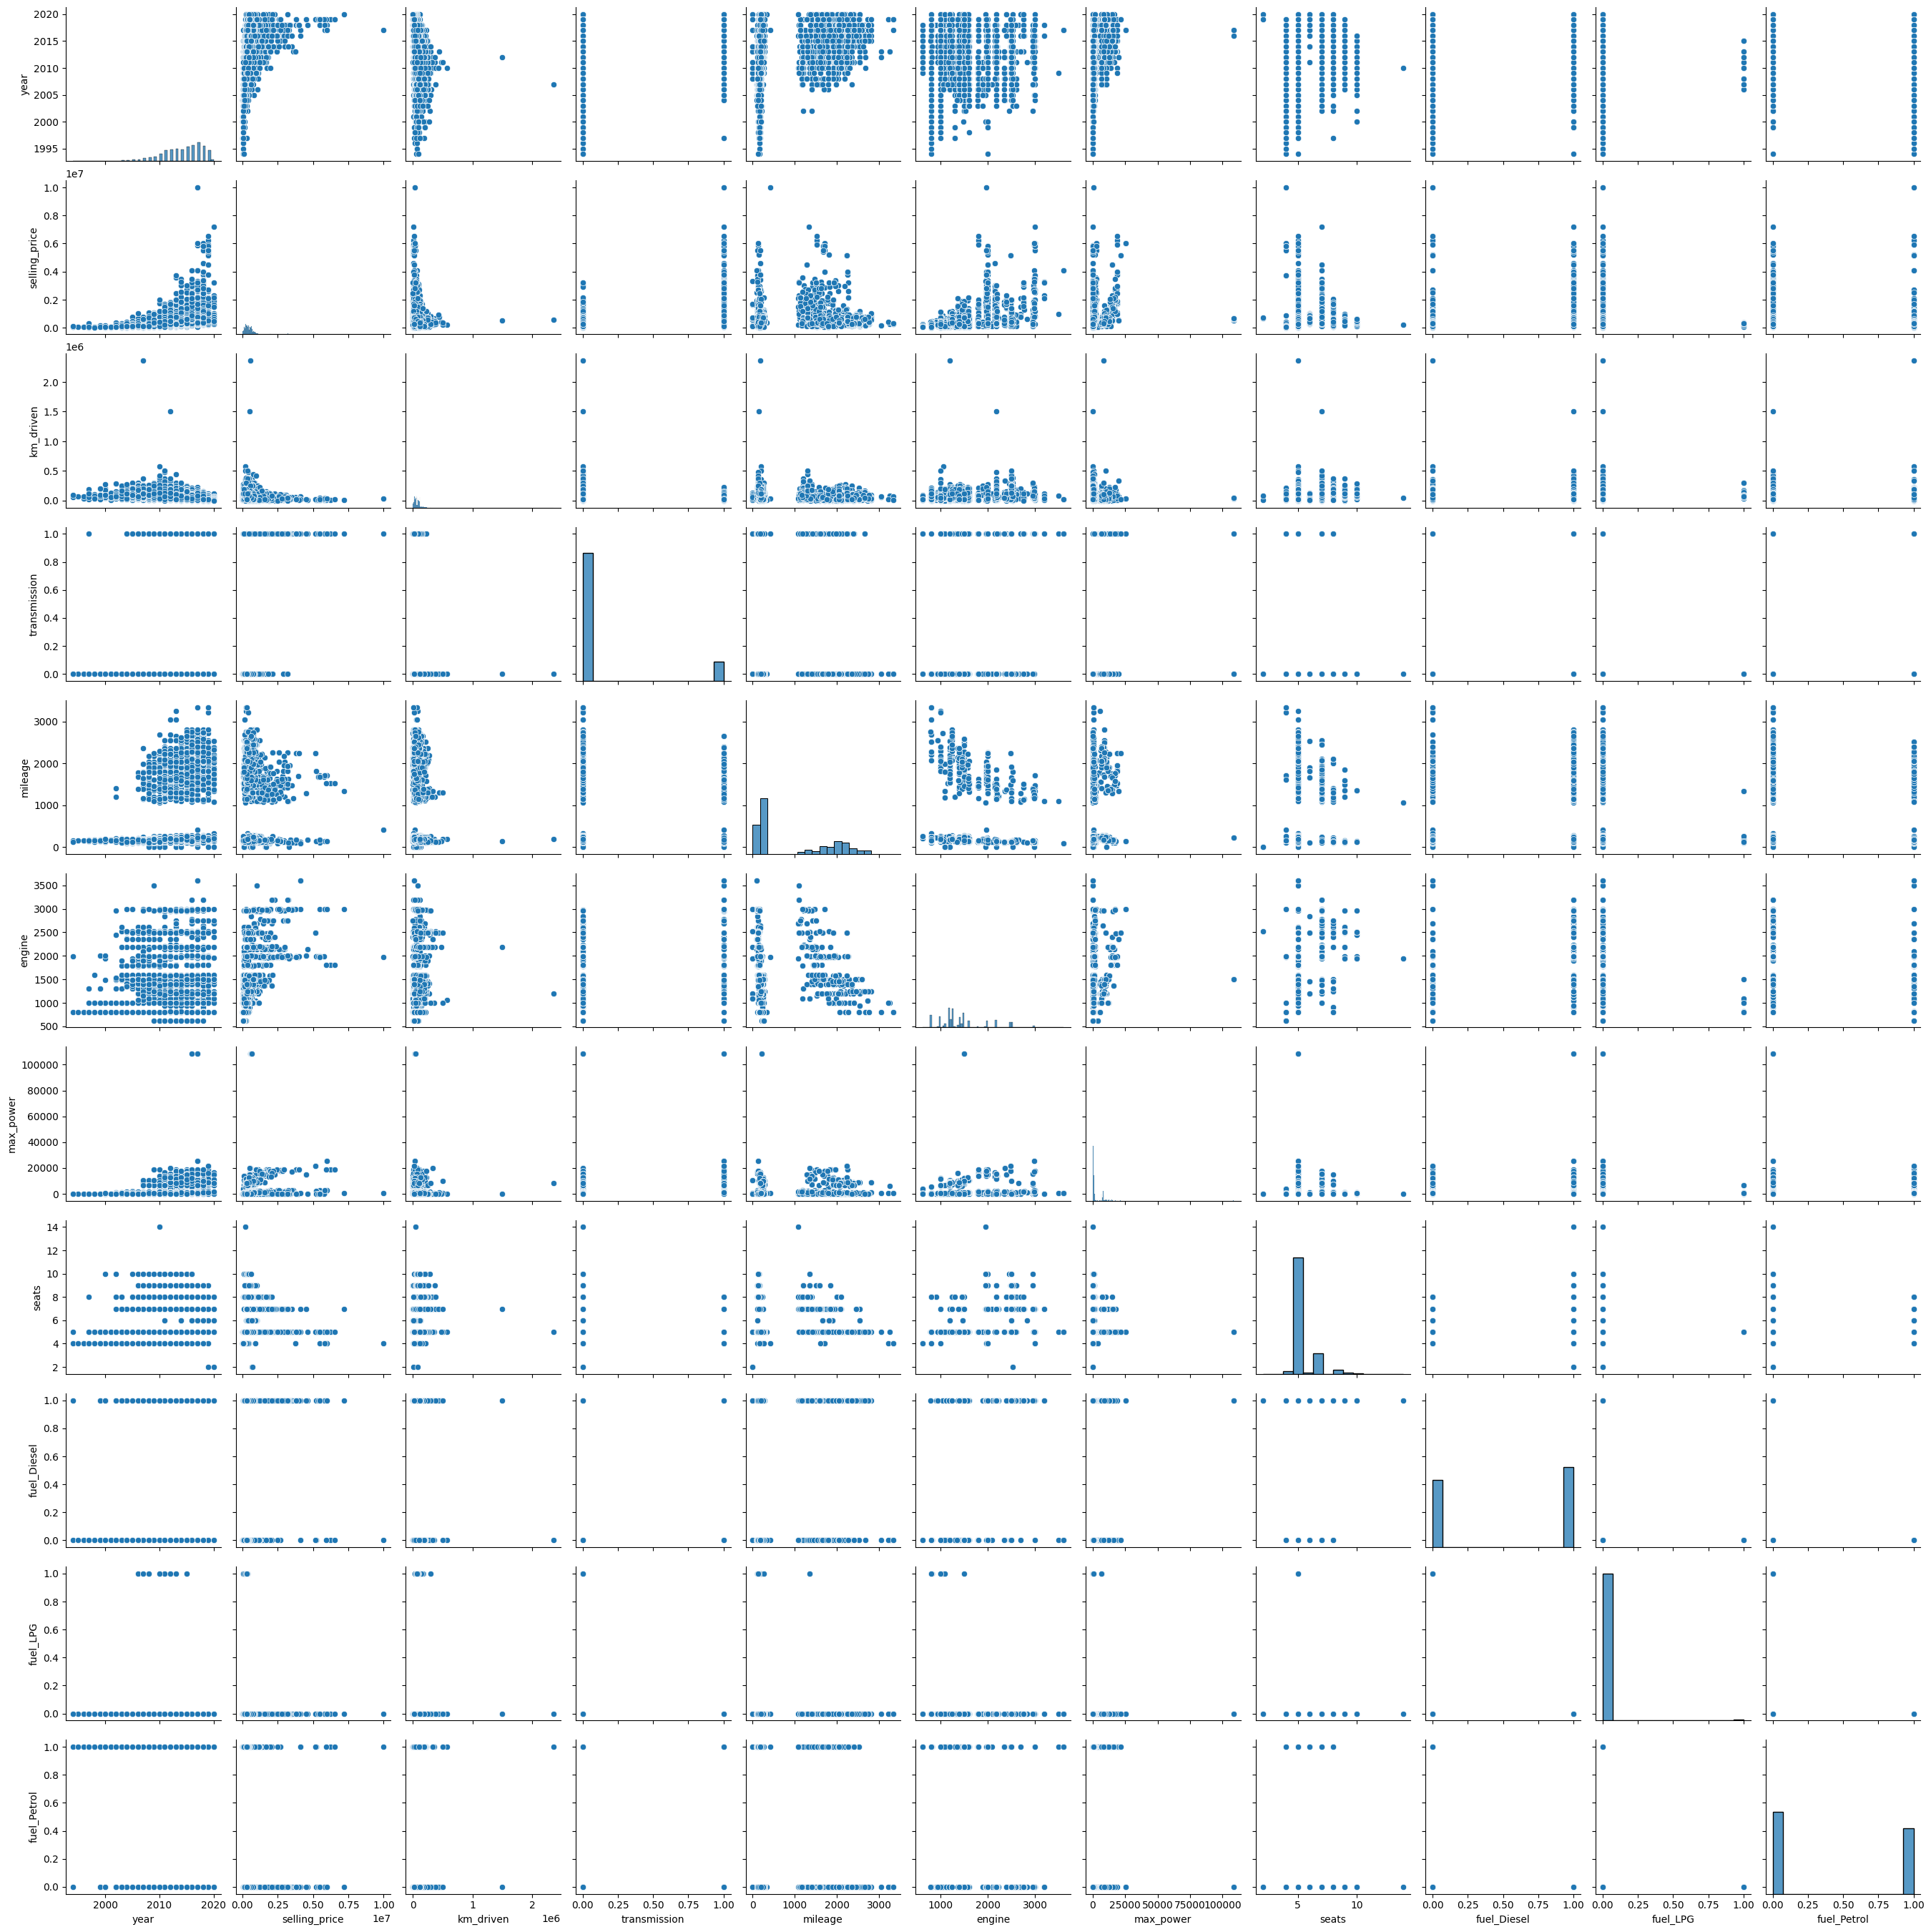

In [17]:
#Pair plot labels
sns.pairplot(data_new)

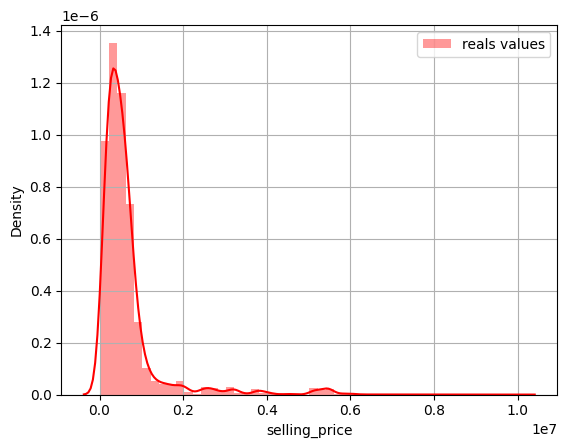

In [18]:
sns.distplot(data_new['selling_price'], label="reals values", color='red')
plt.legend()
plt.grid()
plt.show()

In [19]:
#correlation
corr = pd.DataFrame(data_new.corrwith(data_new['selling_price']))
corr

,0
year,0.412302
selling_price,1.000000
km_driven,-0.222158
transmission,0.590269
mileage,0.098988
engine,0.455682
max_power,0.137042
seats,0.041617
fuel_Diesel,0.204831
fuel_LPG,-0.035978


# Split Data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
print("size train : ",X_train.shape)
print("size test : ",X_test.shape)

size train :  (5534, 10)
size test :  (2372, 10)


# Setting up models

In [21]:
regression = [
    Ridge(),
    KNeighborsRegressor(), 
    LinearRegression(),
    RandomForestRegressor(),
    SVR(),
    DecisionTreeRegressor(), 
    ElasticNet(),
    Lasso(), 
    XGBRegressor()
]

In [22]:
head = 10
for model in regression[:head]:
    start = time()
    model.fit(X_train, Y_train)
    train_time = time() - start
    start = time()
    Y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\t Temps d'entrainement : %0.3fs" % train_time)
    print("\t Temps de prédiction : %0.3fs" % predict_time)
    print("\t MAE score :", mean_absolute_error(Y_test, Y_pred))
    print("\t R2 score :", r2_score(Y_test, Y_pred))
    print("\t Max_error : ", max_error(Y_test, Y_pred))
    print("\t MSE score : ", mean_squared_error(Y_test, Y_pred))
    print()

Ridge()
	 Temps d'entrainement : 0.014s
	 Temps de prédiction : 0.001s
	 MAE score : 0.02996937997545131
	 R2 score : 0.563275406429672
	 Max_error :  0.4539752867762097
	 MSE score :  0.0029490586316302625

KNeighborsRegressor()
	 Temps d'entrainement : 0.015s
	 Temps de prédiction : 0.114s
	 MAE score : 0.009781175000509661
	 R2 score : 0.9246806113199936
	 Max_error :  0.27733196817131717
	 MSE score :  0.0005086072471897975

LinearRegression()
	 Temps d'entrainement : 0.018s
	 Temps de prédiction : 0.003s
	 MAE score : 0.03028970476108429
	 R2 score : 0.5578155727903901
	 Max_error :  0.5171904628972888
	 MSE score :  0.002985927106083595

RandomForestRegressor()
	 Temps d'entrainement : 1.698s
	 Temps de prédiction : 0.063s
	 MAE score : 0.007393877374907403
	 R2 score : 0.9686006258702937
	 Max_error :  0.1779911285187745
	 MSE score :  0.00021202972460969646

SVR()
	 Temps d'entrainement : 0.062s
	 Temps de prédiction : 0.015s
	 MAE score : 0.028460252361910517
	 R2 score : 0.76

# THE WINNER IS XGBRegressor AND RandomForestRegressor

## looking for the best parameters

## RandomForestRegressor

In [23]:
modelRFR= RandomForestRegressor()
modelRFR

RandomForestRegressor()

In [24]:
modelRFR.fit(X_train, Y_train)

RandomForestRegressor()

In [25]:
parameters = {'n_estimators': np.arange(1,30), 'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"], 
              'max_features': ["sqrt", "log2", "None"], 'random_state': np.arange(1,5)}

In [26]:
kf = KFold(n_splits = 5, shuffle=True, random_state=5)
grid = GridSearchCV(modelRFR, parameters, cv=kf, verbose=1)

In [27]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 1392 candidates, totalling 6960 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'random_state': array([1, 2, 3, 4])},
             verbose=1)

In [28]:
grid.best_estimator_

RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                      n_estimators=26, random_state=4)

In [29]:
grid.best_score_

0.9438128032607228

In [30]:
modelRFR = grid.best_estimator_
modelRFR

RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                      n_estimators=26, random_state=4)

In [31]:
modelRFR.fit(X_train, Y_train)

RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                      n_estimators=26, random_state=4)

In [32]:
modelRFR.score(X_train, Y_train)

0.9904613453056764

In [33]:
modelRFR.score(X_test, Y_test)

0.9707851741448748

In [34]:
Y_pred_RFR = modelRFR.predict(X_test)
print(Y_pred_RFR)

[0.05589856 0.0483477  0.01444343 ... 0.05063276 0.08351529 0.07728772]


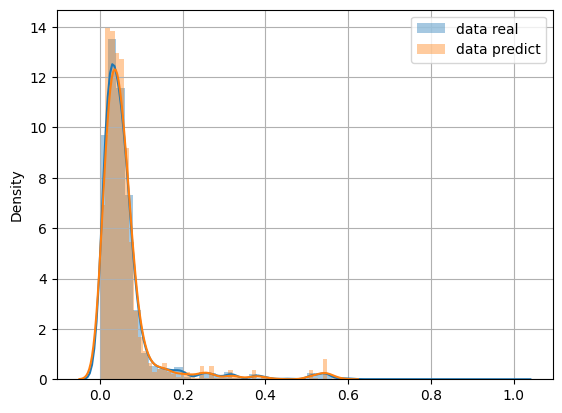

In [35]:
plt.grid(True)
sns.distplot(y, label='data real')
sns.distplot(Y_pred_RFR, label='data predict')
plt.legend()
plt.show()

## XGBRegression 

In [36]:
modelXG = XGBRegressor()
modelXG

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
modelXG.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
parameters = {'n_estimators': np.arange(1,50), 'max_depth': np.arange(1,5), 
              'max_features': ["sqrt", "log2", "None"], 'random_state': np.arange(1,5)}

In [39]:
kf1 = KFold(n_splits = 5, shuffle=True, random_state=5)
grid1 = GridSearchCV(modelXG, parameters, cv=kf1, verbose=1)

In [40]:
grid1.fit(X_train, Y_train)

Fitting 5 folds for each of 2352 candidates, totalling 11760 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': array([1, 2, 3, 4]),
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'random_state': array([1, 2, 3, 4])},
             verbose=1)

In [41]:
modelXG = grid1.best_estimator_
modelXG

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_features='sqrt',
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=49,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
grid1.best_score_

0.9325353333323065

In [43]:
grid1.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_features='sqrt',
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=49,
             n_jobs=None, num_parallel_tree=None, ...)

In [44]:
modelXG.score(X_train, Y_train)

0.9772679815268545

In [45]:
modelXG.score(X_test, Y_test)

0.9613768098316412

In [46]:
Y_pred_XG = modelXG.predict(X_test)
print(Y_pred_XG)

[0.04059134 0.05420575 0.02151247 ... 0.05664548 0.08507872 0.10265834]


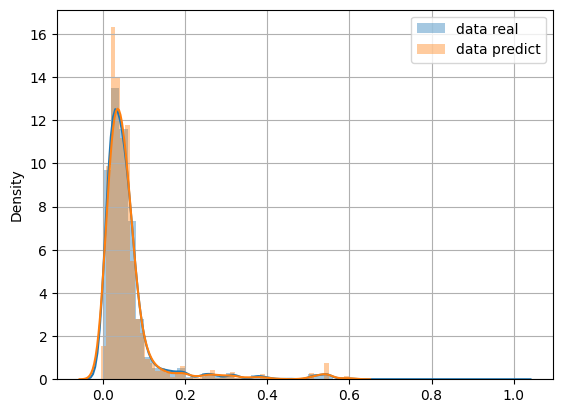

In [47]:
plt.grid(True)
sns.distplot(y, label='data real')
sns.distplot(Y_pred_XG, label='data predict')
plt.legend()
plt.show()

# Conclusion

In [48]:
finale_report = pd.DataFrame({
    'Model': ['RandomForestRegresion()', 'XGBRegression()'], 
    'Score Train': [modelRFR.score(X_train, Y_train), modelXG.score(X_train, Y_train)],
    'Score Test': [modelRFR.score(X_test, Y_test), modelXG.score(X_test, Y_test)]
})

In [49]:
print(finale_report)

                     Model  Score Train  Score Test
0  RandomForestRegresion()     0.990461    0.970785
1          XGBRegression()     0.977268    0.961377


# Conclusion

## THE WINNER IS RANDOMFORESTREGRESSION